In [1]:

import os
from sklearn.preprocessing import MultiLabelBinarizer
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms, models
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
from tqdm import tqdm
import pandas as pd

# 데이터프레임 로드
df_raw = pd.read_csv('multi_label_dataset_cut.csv')

df = df_raw.copy()
# 이미지 디렉토리 설정
image_dir = "../data"

# 데이터프레임 확인

df = df.drop(['Image Filename'],axis=1)
df = df.drop(['None'],axis=1)
df

,Unnamed: 0.1,Unnamed: 0,Image ID,페미닌,로맨틱,리조트,모던,스트리트,스포티,톰보이,매니시,젠더리스
0,0,0,1000,1,0,0,0,0,0,0,0,0
1,1,1,100026,0,1,0,0,0,0,0,0,0
2,2,2,100027,0,1,0,0,0,0,0,0,0
3,3,3,100029,0,1,0,0,0,0,0,0,0
4,4,4,1000316,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152459,152459,152459,999747,0,0,0,0,1,0,0,1,0
152460,152460,152460,999756,0,0,0,0,0,0,1,0,0
152461,152461,152461,999761,0,0,0,0,0,0,1,0,0
152462,152462,152462,999762,0,0,0,0,0,0,1,0,0


In [2]:
# 이미지 경로 생성 함수
def create_image_paths(df, column_name, base_path='../cut_data'):
    # 이미지 경로를 저장할 새로운 열 추가
    df['Image Path'] = df[column_name].apply(lambda x: os.path.join(base_path, f'{x}.jpg'))
    return df

# 이미지 경로 생성
df = create_image_paths(df, 'Image ID')
df = df.drop(['Unnamed: 0','Image ID'],axis=1)
df = df.drop(['Unnamed: 0.1'],axis=1)
df.head()

,페미닌,로맨틱,리조트,모던,스트리트,스포티,톰보이,매니시,젠더리스,Image Path
0,1,0,0,0,0,0,0,0,0,../cut_data\1000.jpg
1,0,1,0,0,0,0,0,0,0,../cut_data\100026.jpg
2,0,1,0,0,0,0,0,0,0,../cut_data\100027.jpg
3,0,1,0,0,0,0,0,0,0,../cut_data\100029.jpg
4,0,1,0,0,0,0,0,0,0,../cut_data\1000316.jpg


In [3]:
df.iloc[100:110]

,페미닌,로맨틱,리조트,모던,스트리트,스포티,톰보이,매니시,젠더리스,Image Path
100,1,0,0,1,0,0,0,0,0,../cut_data\1001288.jpg
101,1,0,0,0,1,0,0,0,0,../cut_data\1001290.jpg
102,1,0,0,0,1,0,0,0,0,../cut_data\1001291.jpg
103,1,0,0,1,0,0,0,0,0,../cut_data\1001292.jpg
104,1,0,0,0,1,0,0,0,0,../cut_data\1001293.jpg
105,1,0,0,0,1,0,0,0,0,../cut_data\1001294.jpg
106,1,0,0,1,0,0,0,0,0,../cut_data\1001297.jpg
107,1,0,0,1,0,0,0,0,0,../cut_data\1001298.jpg
108,1,0,0,1,0,0,0,0,0,../cut_data\1001299.jpg
109,1,0,0,0,1,0,0,0,0,../cut_data\1001300.jpg


In [5]:
df = df.drop('스트리트',axis=1)


KeyError: "['스트리트'] not found in axis"

In [10]:
df.iloc[12220:12250]

,페미닌,로맨틱,리조트,모던,스포티,톰보이,매니시,젠더리스,Image Path
12220,1,0,0,0,0,0,0,0,../cut_data\111250.jpg
12221,1,0,0,0,0,0,0,0,../cut_data\111253.jpg
12222,1,0,0,0,0,0,0,0,../cut_data\111254.jpg
12223,0,1,0,0,0,0,0,0,../cut_data\111257.jpg
12224,0,1,0,0,0,0,0,0,../cut_data\111259.jpg
12225,0,1,0,0,0,0,0,0,../cut_data\111260.jpg
12226,0,1,0,0,0,0,0,0,../cut_data\111261.jpg
12227,1,1,0,0,0,0,0,0,../cut_data\111266.jpg
12228,1,1,0,0,0,0,0,0,../cut_data\111267.jpg
12229,1,1,0,0,0,0,0,0,../cut_data\111268.jpg


In [27]:
# 이미지 경로 생성 함수
def create_image_paths_cut(df, column_name, base_path='../cut_datas'):
    # 이미지 경로를 저장할 새로운 열 추가
    df['Image Path'] = df[column_name].apply(lambda x: os.path.join(base_path, f'{x}.jpg'))
    return df

# 이미지 경로 생성
df = create_image_paths_cut(df, 'Image ID')
df = df.drop(['Unnamed: 0','Image ID'],axis=1)
df.head()

KeyError: 'Image ID'

In [28]:
# 열 이름 확인
print(df.columns)

# 이미지 경로 열과 레이블 열 설정
image_path_column = 'Image Path'  # 이미지 경로 열 이름
label_columns = [col for col in df.columns if col != image_path_column]  # 이미지 경로 열을 제외한 모든 열을 레이블로 설정

print(image_path_column)
print(label_columns)

Index(['페미닌', '로맨틱', '리조트', '모던', '스트리트', '스포티', '톰보이', '매니시', '젠더리스',
       'Image Path'],
      dtype='object')
Image Path
['페미닌', '로맨틱', '리조트', '모던', '스트리트', '스포티', '톰보이', '매니시', '젠더리스']


In [29]:
ones_count = df.drop(columns=['Image Path']).apply(lambda x: (x == 1).sum())
ones_count.sum()

216342

In [30]:
df = df.drop(['스트리트'],axis = 1)

In [31]:
df

,페미닌,로맨틱,리조트,모던,스포티,톰보이,매니시,젠더리스,Image Path
0,1,0,0,0,0,0,0,0,../cut_data\1000.jpg
1,0,1,0,0,0,0,0,0,../cut_data\100026.jpg
2,0,1,0,0,0,0,0,0,../cut_data\100027.jpg
3,0,1,0,0,0,0,0,0,../cut_data\100029.jpg
4,0,1,0,0,0,0,0,0,../cut_data\1000316.jpg
...,...,...,...,...,...,...,...,...,...
152459,0,0,0,0,0,0,1,0,../cut_data\999747.jpg
152460,0,0,0,0,0,1,0,0,../cut_data\999756.jpg
152461,0,0,0,0,0,1,0,0,../cut_data\999761.jpg
152462,0,0,0,0,0,1,0,0,../cut_data\999762.jpg


In [6]:
import pandas as pd
from sklearn.utils import resample

# 데이터프레임 로드
df_raw = pd.read_csv('multi_label_dataset.csv')
df = df_raw.copy()
df = df.drop(['Image Filename', 'None'], axis=1)

# 이미지 경로 생성
df = create_image_paths(df, 'Image ID')
df = df.drop(['Unnamed: 0', 'Image ID'], axis=1)
df = df.drop(['스트리트'], axis=1)

# 각 클래스별로 데이터 수 확인
class_counts = df.sum(axis=0)
print("Class distribution before balancing:")
print(class_counts)

# 클래스별로 데이터 수를 맞추는 함수
def balance_multi_label_classes(df, target_count=10000):
    label_columns = df.columns[:-1]
    balanced_dfs = []
    
    for label in tqdm(label_columns):
        label_df = df[df[label] == 1]
        non_label_df = df[df[label] == 0]
        
        if len(label_df) < target_count:
            # 오버샘플링
            label_df = resample(label_df, replace=True, n_samples=target_count, random_state=42)
        else:
            # 언더샘플링
            label_df = resample(label_df, replace=False, n_samples=target_count, random_state=42)
        
        balanced_dfs.append(label_df)
    
    # 중복 제거 및 최종 데이터프레임 생성
    final_df = pd.concat(balanced_dfs).drop_duplicates().reset_index(drop=True)
    
    return final_df

# 데이터 균형 맞추기
df_balanced = balance_multi_label_classes(df, target_count=10000)

# 각 클래스별로 데이터 수 확인
class_counts_balanced = df_balanced.sum(axis=0)
print("Class distribution after balancing:")
print(class_counts_balanced)

# 저장 또는 후속 작업 수행
# df_balanced.to_csv('balanced_multi_label_dataset.csv', index=False)


In [24]:

# 각 라벨에서 10,490개씩 샘플링하여 균형 맞추기
df = balance_labels(df, sample_size=10000)

In [25]:
ones_count = df.drop(columns=['Image Path']).apply(lambda x: (x == 1).sum())

ones_count

로맨틱         15194
리조트         15897
톰보이         11782
매니시         12438
젠더리스        12695
모던          19671
소피스트케이티드    14253
스포티         10704
컨트리         13527
클래식         16336
페미닌         18001
dtype: int64

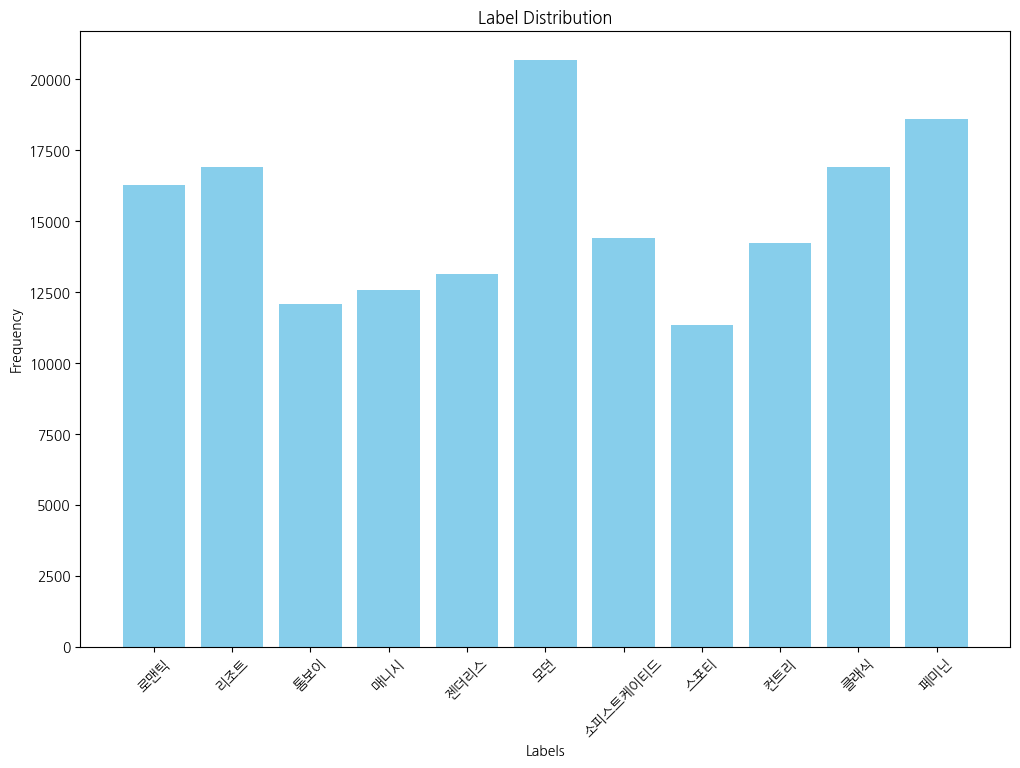

In [13]:
import matplotlib.pyplot as plt

# 라벨 이름과 빈도수
labels = ['로맨틱', '리조트', '톰보이', '매니시', '젠더리스', '모던', '소피스트케이티드', '스포티', '컨트리', '클래식', '페미닌']
frequencies = [16286, 16919, 12075, 12585, 13142, 20674, 14418, 11356, 14243, 16905, 18601]

# 라벨 분포 시각화
plt.figure(figsize=(12, 8))
plt.bar(labels, frequencies, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

In [40]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os
import numpy as np

# 멀티레이블을 위한 커스텀 데이터셋 클래스
class ClothesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.transform = transform
        self.image_paths = df.iloc[:, -1].apply(lambda x: os.path.abspath(os.path.join('../data', x))).to_numpy()
        self.labels = np.array(df.iloc[:, :-1])
        #self.image_paths = df[image_path_column].values  # 이미지 경로 열
        #self.labels = df[label_columns].values.astype(float)  # 레이블 열

        # 레이블의 형태를 출력하여 확인
        print(f'Labels shape: {self.labels.shape}')
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None

        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        
        return image.clone().detach().float(), torch.tensor(label, dtype=torch.float32)
    
def collate_fn(batch):
    batch = [item for item in batch if item[0] is not None]
    return torch.utils.data.dataloader.default_collate(batch)

In [41]:
from torch.utils.data import DataLoader
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm  # tqdm 라이브러리 임포트

def compute_mean_std(dataset):
    """
    주어진 이미지 데이터셋의 평균과 표준편차를 계산합니다.
    
    Args:
        dataset (torch.utils.data.Dataset): 이미지 데이터셋
    
    Returns:
        tuple: (mean, std) 각 채널(RGB)의 평균과 표준편차를 담은 튜플
    """
    loader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=4)
    
    mean = torch.zeros(3)
    std = torch.zeros(3)
    n_samples = 0

    for images, _ in tqdm(loader, desc="Computing mean and std"):
        images = images[0]  # 배치 크기가 1이므로 첫 번째 이미지만 선택
        n_samples += 1
        for i in range(3):
            mean[i] += images[i, :, :].mean()
            std[i] += images[i, :, :].std()

    mean.div_(n_samples)
    std.div_(n_samples)
    
    return mean.numpy(), std.numpy()



In [42]:
# 데이터 변환 정의 (초기 변환은 ToTensor만 적용)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# 데이터셋 생성
dataset = ClothesDataset(df=df, transform=transform)


Labels shape: (120000, 12)


In [43]:
'''
# 평균과 표준편차 계산
mean, std = compute_mean_std(dataset)
print("Mean: ", mean)
print("Std: ", std)
'''

mean = [0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

In [44]:
# 데이터 변환 정의
'''
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])'''
'''
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])'''

'\ntest_transform = transforms.Compose([\n    transforms.Resize((224, 224)),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=mean, std=std)\n])'

In [45]:
# 전체 데이터셋의 인덱스를 생성
indices = list(range(len(dataset)))

# 먼저 train+val과 test를 90:10 비율로 나눕니다.
train_val_indices, test_indices = train_test_split(indices, test_size=0.1, random_state=42)

# train+val 인덱스를 다시 train과 val로 7:2 비율로 나눕니다.
train_indices, val_indices = train_test_split(train_val_indices, test_size=2/9, random_state=42)

In [46]:
# Subset으로 나누기
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

In [20]:
subset_indices = torch.randperm(len(train_dataset))[:1000]  # 데이터셋의 일부만 사용
train_subset = torch.utils.data.Subset(train_dataset, subset_indices)
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True,num_workers=0,pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False,pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False,pin_memory=True)

In [48]:
# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,num_workers=16,pin_memory=True,collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False,pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False,pin_memory=True)

In [49]:
# 모델 생성 및 전이학습
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

for param in model.parameters():
    param.requires_grad = False


num_ftrs = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024), # 512 -> 1024
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(1024, len(label_columns)) # 1024- > 12
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)
criterion = nn.BCELoss()


In [50]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [51]:
# 모델이 CUDA를 사용하고 있는지 확인하는 함수
def check_model_on_cuda(model):
    is_cuda = next(model.parameters()).is_cuda
    if is_cuda:
        print("The model is using CUDA.")
    else:
        print("The model is not using CUDA.")

In [52]:
check_model_on_cuda(model)

The model is using CUDA.


In [53]:
from torch.utils.tensorboard import SummaryWriter

# TensorBoard SummaryWriter 생성
writer = SummaryWriter()

In [54]:
from tqdm import tqdm
import torchmetrics
# 학습 및 검증 루프
num_epochs = 5
best_val_loss = float('inf')
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


def train_and_validate_best(model, train_loader, val_loader, optimizer, criterion, epochs, device, class_num):
    
    train_accuracy_metrics = torchmetrics.Accuracy(task="multiclass", num_classes=class_num, average='macro').to(device)
    min_val_loss = float('inf')  # 가장 좋은 모델을 추적하기 위한 변수 초기화
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        train_accuracy_metrics.reset()  # 매 에포크마다 정확도 초기화
        print("학습 시작")

        for inputs, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            outputs = torch.sigmoid(outputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            # 학습 정확도 계산
            train_accuracy_metrics.update(outputs, labels)
        
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        # 정확도 계산
        train_accuracy = train_accuracy_metrics.compute().item()
        train_accuracies.append(train_accuracy)
        
        # 검증 과정
        model.eval()
        running_val_loss = 0.0
        val_accuracy_metrics = torchmetrics.Accuracy(task='multiclass', num_classes=class_num, average='macro').to(device)
        val_accuracy_metrics.reset()  # 검증 정확도 초기화

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Validation Epoch {epoch+1}"):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                outputs = torch.sigmoid(outputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
                val_accuracy_metrics.update(outputs, labels)
        
        epoch_val_loss = running_val_loss / len(val_loader)
        val_losses.append(epoch_val_loss)
        val_accuracy = val_accuracy_metrics.compute().item()
        val_accuracies.append(val_accuracy)
        
        logger.info(f'Epoch [{epoch + 1}/{epochs}] - Training loss: {epoch_loss:.3f}, Validation loss: {epoch_val_loss:.3f}, Train accuracy: {train_accuracy:.2%}, Val accuracy: {val_accuracy:.2%}')

        print(f'Epoch [{epoch + 1}/{epochs}] - Training loss: {epoch_loss:.3f}, Validation loss: {epoch_val_loss:.3f}, Train accuracy: {train_accuracy:.2%}, Val accuracy: {val_accuracy:.2%}')
        
        # 가장 좋은 모델만 저장
        if epoch_val_loss < min_val_loss:
            min_val_loss = epoch_val_loss
            torch.save(model.state_dict(), 'best_model_integrated.pth')
            print(f'Best model saved at epoch {epoch + 1}')

In [55]:
if __name__ == "__main__":
    train_and_validate_best(model, train_loader, val_loader, optimizer, criterion, num_epochs, device, len(label_columns))

학습 시작


Training Epoch 1:   0%|          | 0/1313 [00:00<?, ?it/s]

In [32]:

# 학습 및 검증 수행
train_and_validate_best(model, train_loader, val_loader, optimizer, criterion, num_epochs, device, len(label_columns))


학습 시작


Training Epoch 1:   0%|          | 0/1313 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
train_and_validate_best(model, train_loader, val_loader, optimizer, criterion, num_epochs, device, len(label_columns))


In [100]:
# 테스트 루프 정의
def test_model(model, criterion, test_loader):
    model.eval()
    test_loss_sum = 0
    test_correct = 0
    test_count = 0
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            outputs = torch.sigmoid(outputs)
            loss = criterion(outputs, labels)
            test_loss_sum += loss.item()
            preds = outputs > 0.5
            test_correct += torch.sum(preds == labels).item()
            test_count += labels.size(0)

    test_loss = test_loss_sum / len(test_loader)
    test_accuracy = test_correct / (test_count * labels.size(1))
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

In [101]:
test_model(model,criterion,test_loader)

Testing: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

Test Loss: 0.06292855134233832, Test Accuracy: 0.9761666666666666


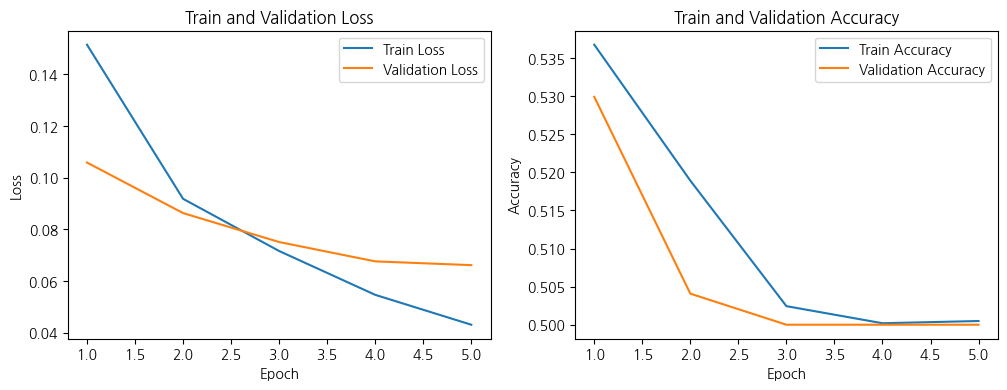

In [102]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 시각화
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
greater_than_half = nn.Sigmoid()(model(img.to('cuda'))) > 0.5
result = torch.nonzero(greater_than_half)
result

In [ ]:
label_result = label > 0.5
result1 = torch.nonzero(greater_than_half)
result1

In [ ]:
true_sum = 0

for temp,temp1 in zip(result,result1):
    print(temp.to('cpu'),temp1.to('cpu'))
    result_data = torch.equal(temp.to('cpu'),temp1.to('cpu'))
    if result_data:
        true_sum += 1
print(true_sum/len(result))

In [ ]:
model.eval()
nn.Sigmoid()(model(img.to('cuda')))
greater_than_half = nn.Sigmoid()(model(img.to('cuda'))) > 0.5
result = torch.nonzero(greater_than_half)
result

In [ ]:
train_df.columns[[0,4]]

In [ ]:
greater_than_half = label > 0.5
result = torch.nonzero(greater_than_half)
result

In [ ]:
# 예시 데이터프레임 생성
data = {
    'image': ['path_to_image1.jpg', 'path_to_image2.jpg', 'path_to_image3.jpg', 'path_to_image4.jpg'],
    'black': [1, 0, 0, 1],
    'blue': [0, 1, 1, 0],
    'brown': [0, 1, 0, 0],
    'green': [0, 0, 1, 0],
    'red': [1, 0, 0, 1],
    'white': [0, 1, 0, 0],
    'dress': [1, 0, 0, 1],
    'pants': [0, 1, 1, 0],
    'shirt': [0, 0, 1, 0],
    'shoes': [0, 0, 0, 1],
    'short': [0, 0, 0, 0]
}

df = pd.DataFrame(data)
df

In [29]:
# 데이터 변환 정의 (초기 변환은 ToTensor만 적용)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# 데이터셋 생성
dataset = ClothesDataset(df=df, image_path_column=image_path_column, label_columns=label_columns, transform=transform)

# 전체 데이터셋의 인덱스를 생성
test_indices = list(range(len(dataset)))

# 먼저 train+val과 test를 90:10 비율로 나눕니다.
train_val_indices, test_indices = train_test_split(indices, test_size=0.1, random_state=42)

# train+val 인덱스를 다시 train과 val로 7:2 비율로 나눕니다.
train_indices, val_indices = train_test_split(train_val_indices, test_size=2/9, random_state=42)

# Subset으로 나누기
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

subset_indices = torch.randperm(len(train_dataset))[:10000]  # 데이터셋의 일부만 사용

train_subset = torch.utils.data.Subset(train_dataset, subset_indices)
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True,num_workers=16,pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False,pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False,pin_memory=True)

# # DataLoader 생성
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,num_workers=16,pin_memory=True)
# val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False,pin_memory=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False,pin_memory=True)

TypeError: ClothesDataset.__init__() got an unexpected keyword argument 'image_path_column'